In [1]:
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram

In [3]:
from qiskit import IBMQ
IBMQ.save_account('9f8857f4b76aff1cf0d0a8f4476724e9218e4e2580c36e1997673d44aa8c14f2c0f458fe85cb1ebdcf47351ba88af4c4b0539d7db9d6d005c29153c3031c351a',overwrite=True)
provider = IBMQ.load_account()
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble


In [19]:
b = '110'
n = len(b)
qc = QuantumCircuit(n*2, n)

# HADAMARD
qc.h([0,1,2])    
    
# BARRIER
qc.barrier()

qc += simon_oracle(b)

# BARRIER
qc.barrier()

# Apply Hadamard gates to the input register
qc.h([0,1,2])

# Measure qubits
qc.measure([0,1,2], [0,1,2])
qc.draw()

/var/folders/8f/4b2m45n11v3_s7xc7ndmx0nw0000gp/T/ipykernel_5021/225014128.py:11: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += simon_oracle(b)


┌───┐ ░                           ░ ┌───┐┌─┐      
q_0: ┤ H ├─░───■───────────────────────░─┤ H ├┤M├──────
     ├───┤ ░   │                       ░ ├───┤└╥┘┌─┐   
q_1: ┤ H ├─░───┼────■─────────■────■───░─┤ H ├─╫─┤M├───
     ├───┤ ░   │    │         │    │   ░ ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─░───┼────┼────■────┼────┼───░─┤ H ├─╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │    │   ░ └───┘ ║  ║ └╥┘
q_3: ──────░─┤ X ├──┼────┼────┼────┼───░───────╫──╫──╫─
           ░ └───┘┌─┴─┐  │  ┌─┴─┐  │   ░       ║  ║  ║ 
q_4: ──────░──────┤ X ├──┼──┤ X ├──┼───░───────╫──╫──╫─
           ░      └───┘┌─┴─┐└───┘┌─┴─┐ ░       ║  ║  ║ 
q_5: ──────░───────────┤ X ├─────┤ X ├─░───────╫──╫──╫─
           ░           └───┘     └───┘ ░       ║  ║  ║ 
c: 3/══════════════════════════════════════════╩══╩══╩═
                                               0  1  2

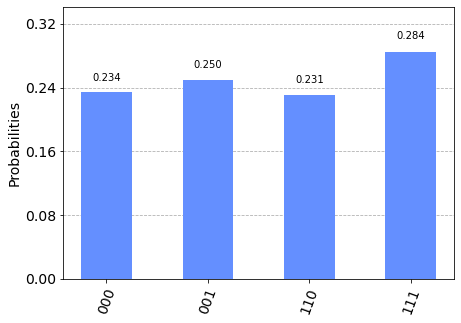

In [22]:
# Simulator
sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, shots=1024)
results = sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [23]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.111 = 0 (mod 2)
110.000 = 0 (mod 2)
110.110 = 0 (mod 2)
110.001 = 0 (mod 2)


In [25]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 1024
transpiled_simon_circuit = transpile(qc, backend, optimization_level=3)
qobj = assemble(transpiled_simon_circuit, shots=shots)
job = backend.run(qobj)
job_monitor(job, interval=2)

ibmqfactory.load_account:WARNING:2022-05-18 10:44:57,711: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem


TranspilerError: 'Number of qubits (6) in circuit-12 is greater than maximum (5) in the coupling_map'

In [ ]:
# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [ ]:
# Calculate the dot product of the results
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

print('b = ' + b)
for z in device_counts:
    print( '{}.{} = {} (mod 2) ({:.1f}%)'.format(b, z, bdotz(b,z), device_counts[z]*100/shots))